In [1]:
import glob
import numpy as np

import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../..')))

from skimage import img_as_uint

from Lamp.AttrDict.AttrDict import *
from Lamp.preprocessing.preprocessing import * 

In [ ]:
inputs = AttrDict.from_yaml_path('config/test.yaml')

print(inputs)

In [ ]:
root_load = inputs.rootLoad
folder_to_load = inputs.folderLoad

path_load = os.path.dirname(inputs.rootLoad + inputs.folderLoad)

path_save = os.path.dirname(inputs.rootSave + inputs.folderSave)

files_types = inputs.imgTypes

lists_of_files = [glob.glob(path_load + type_) for type_ in files_types]
list_of_files = [item for elem in lists_of_files for item in elem]

Error: Session cannot generate requests

In [ ]:
#list_of_files

Error: Session cannot generate requests

In [ ]:
image_raw = Image_Raw(list_of_files[439],'unchanged')

Error: Session cannot generate requests

In [ ]:
# First
Custom().apply(image = image_raw, thres = Otsu().return_threshold(image_raw))

# Second
selem = disk(1)
Erosion(selem=selem).apply(image_raw)

# Third
Mask().apply(image_raw)

Labelize().apply(image_raw,threshold=1000)

# Fourth
selem = disk(1)
Dilation(selem=selem).apply(image_raw)

# Fifth
selem = disk(3)
Closing(selem=selem).apply_regions(image_raw,2)

# Sixth
Rescale_Intenstiy().apply_regions(image_raw, in_range=(1,99), out_range = (0,1), background=False)

In [ ]:
define_regions(image_raw)

Resize(out_shape=256).apply_regions(image_raw,type='bbox',name='resized')

Resize(out_shape=256).apply_regions(image_raw,type='mar',name='resized')

Padding(out_shape=256).apply_regions(image_raw,type='bbox',name='padded')

Padding(out_shape=256).apply_regions(image_raw,type='mar',name='padded')

# Save "Raw" BBOX and MAR


C:\Users\nilso\Anaconda3\lib\site-packages\skimage\util\dtype.py:525: UserWarning: Downcasting int32 to uint8 without scaling because max value 1 fits in uint8
  return _convert(image, np.uint8, force_copy)


In [ ]:
if os.path.isdir(path_save) is False:
        os.mkdir(path_save)

In [ ]:
def save_to_png(image,path_save,**kwargs):

    image_name = image_raw.load_path.split('\\')[1].split('.')[0]
    
    if kwargs:
        if 'type' in kwargs:
            if 'name' in kwargs:                
                for i_, region in enumerate(image.regions):
                    imToSave = region[kwargs['type']][kwargs['name']]
                    imToSave = img_as_uint(imToSave)

                    fname = f"{path_save}/{image_name}_{kwargs['type']}_{kwargs['name']}_{str(i_+1)}.png"
                    print(fname)
            else:
                for i_, region in enumerate(image.regions):
                    imToSave = region[kwargs['type']]['new']
                    imToSave = img_as_uint(imToSave)
                    fname = f"{path_save}/{image_name}_{kwargs['type']}_raw_{str(i_+1)}.png"
                    print(fname)

In [ ]:
#save_to_png(image_raw, path_save=path_save, type='bbox')

In [ ]:
#save_to_png(image_raw, path_save=path_save, type='bbox',name='padded')

In [ ]:
#save_to_png(image_raw, path_save=path_save, type='bbox',name='resized')

In [ ]:
#save_to_png(image_raw, path_save=path_save, type='mar')

In [ ]:
#save_to_png(image_raw, path_save=path_save, type='mar',name='padded')

In [ ]:
#save_to_png(image_raw, path_save=path_save, type='mar',name='resized')

In [ ]:
import PIL.Image as Image

In [ ]:
im = Image.open('C:/Users/nilso/Documents/EPFL/MA4/PDS Turberg/Rock_Cuttings_Characterisation/Cuttings_Characterisation/Data/Train/BL3-1-DL/slice00460 (2020_05_17 16_28_34 UTC)_mar_raw_1.png')

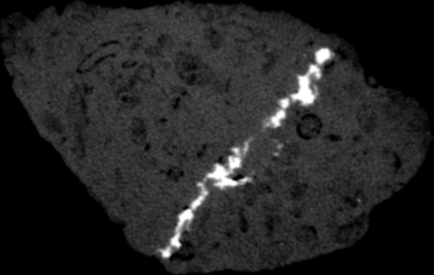

In [ ]:
im

In [ ]:
dict_transform = {
    "Padding":Padding,
    "VerticalFlip":tf.RandomVerticalFlip,
    "HorizontalFlip":tf.RandomHorizontalFlip,
    "Rotation":tf.RandomRotation,
    "CenterCrop":tf.CenterCrop,
    "Resize":tf.Resize,
    }

NameError: name 'tf' is not defined